In [245]:
import pandas  as pd 
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [246]:
data=pd.read_csv("vaccination_tweets.csv")
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [247]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.518000e+03,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000
mean,1.341949e+18,6.342983e+04,1170.952740,13380.415012,1.715250,10.464654
std,2.768504e+15,4.762127e+05,2469.263253,41706.034152,12.237077,74.644921
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.339437e+18,1.140000e+02,165.000000,342.000000,0.000000,0.000000
50%,1.341481e+18,6.060000e+02,441.000000,1659.000000,0.000000,1.000000
75%,1.344353e+18,2.978000e+03,1191.000000,9733.750000,1.000000,4.000000
max,1.347131e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2518 non-null   int64 
 1   user_name         2518 non-null   object
 2   user_location     1998 non-null   object
 3   user_description  2394 non-null   object
 4   user_created      2518 non-null   object
 5   user_followers    2518 non-null   int64 
 6   user_friends      2518 non-null   int64 
 7   user_favourites   2518 non-null   int64 
 8   user_verified     2518 non-null   bool  
 9   date              2518 non-null   object
 10  text              2518 non-null   object
 11  hashtags          1884 non-null   object
 12  source            2517 non-null   object
 13  retweets          2518 non-null   int64 
 14  favorites         2518 non-null   int64 
 15  is_retweet        2518 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 280.4+ KB


In [249]:
columns=[]
for i in  data.columns:
   columns.append(i)
columns

['id',
 'user_name',
 'user_location',
 'user_description',
 'user_created',
 'user_followers',
 'user_friends',
 'user_favourites',
 'user_verified',
 'date',
 'text',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [250]:
data.isnull().any()

id                  False
user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
retweets            False
favorites           False
is_retweet          False
dtype: bool

In [251]:
data.isnull().sum()

id                    0
user_name             0
user_location       520
user_description    124
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            634
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [252]:
data.shape

(2518, 16)

<AxesSubplot:>

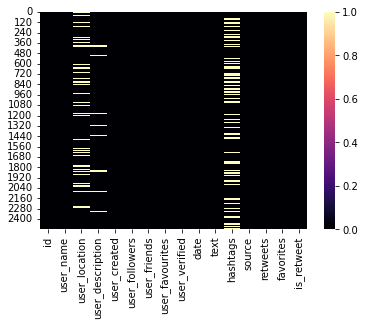

In [253]:
sns.heatmap(data.isnull(),cmap="magma")

In [254]:
data.shape

(2518, 16)

In [255]:
null_value_column=[]
for i in data.columns:
    if data[i].isnull().any()==True:
      null_value_column.append(i)
null_value_column

['user_location', 'user_description', 'hashtags', 'source']

In [256]:
np.where(data['user_location'].isnull())
data['user_location'][20]


nan

In [257]:
np.where(data['user_description'].isnull())
data['user_description'][20]

nan

In [258]:
np.where(data["hashtags"].isnull())
data['hashtags'][1]

nan

In [259]:
np.where(data["source"].isnull())
data['source'] [1839]

nan

In [260]:
data['user_location'] = data["user_location"].fillna("Location Unavialable")
data['user_description'] = data["user_description"].fillna("User Description Unavialable")
data['hashtags'] = data["hashtags"].fillna("Hashtag Unavialable")
data['source'] = data["source"].fillna("Source Unavialable")


In [261]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [262]:
data.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,Hashtag Unavialable,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False


In [263]:
data.shape

(2518, 16)

In [264]:
for i in columns:
  print("number of unique values in",i,"is = ",len(np.unique(data[i])))

number of unique values in id is =  2518
number of unique values in user_name is =  1704
number of unique values in user_location is =  876
number of unique values in user_description is =  1614
number of unique values in user_created is =  1703
number of unique values in user_followers is =  1307
number of unique values in user_friends is =  1157
number of unique values in user_favourites is =  1616
number of unique values in user_verified is =  2
number of unique values in date is =  2516
number of unique values in text is =  2518
number of unique values in hashtags is =  1192
number of unique values in source is =  27
number of unique values in retweets is =  42
number of unique values in favorites is =  115
number of unique values in is_retweet is =  1


### DATA VISUALIZATION 

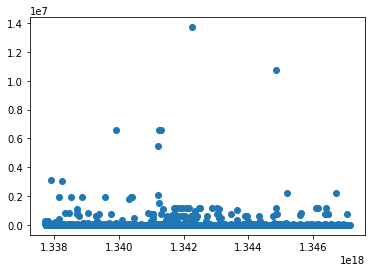

In [265]:
plt.scatter(data["id"], data['user_followers'])

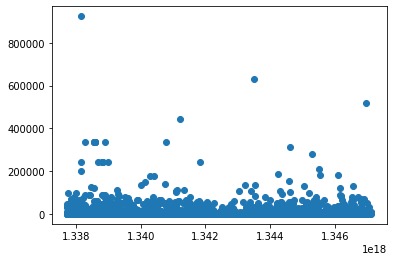

In [266]:
plt.scatter(data['id'], data['user_favourites'])

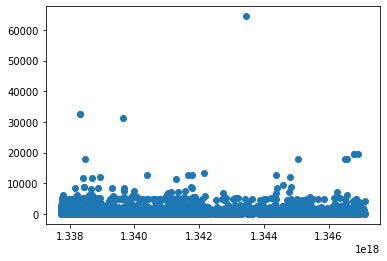

In [267]:
plt.scatter(data['id'], data['user_friends'])

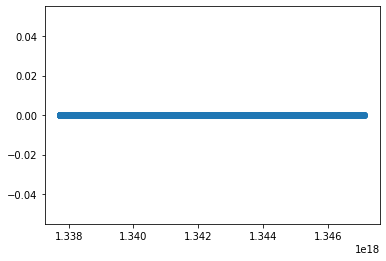

In [268]:
plt.scatter(data['id'],data['is_retweet'])

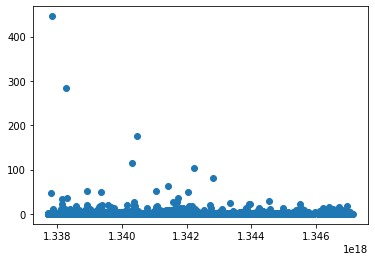

In [269]:
plt.scatter(data['id'],data['retweets'])

In [270]:
from sklearn.preprocessing  import  LabelEncoder
data['user_name']=LabelEncoder().fit_transform(data['user_name'])
data['user_description']=LabelEncoder().fit_transform(data['user_description'])
data['hashtags']=LabelEncoder().fit_transform(data["hashtags"])
data['source']=LabelEncoder().fit_transform(data['source'])


In [271]:
data.drop('date', axis=1,inplace=True)

In [272]:
data.head(2)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,"La Crescenta-Montrose, CA",140,2009-04-08 17:52:46,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,"San Francisco, CA",867,2009-09-21 15:27:30,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [273]:
data.drop('user_created', axis=1,inplace=True)

In [274]:
data.head(2)

,id,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,1139,"La Crescenta-Montrose, CA",140,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False
1,1338158543359250433,63,"San Francisco, CA",867,834,666,178,False,While the world has been on the wrong side of ...,0,22,1,1,False


In [275]:
data.drop('id',axis = 1,inplace=True)

data.head(1)

,user_name,user_location,user_description,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,retweets,favorites,is_retweet
0,1139,"La Crescenta-Montrose, CA",140,405,1692,3247,False,Same folks said daikon paste could treat a cyt...,754,23,0,0,False


<AxesSubplot:xlabel='user_name', ylabel='count'>

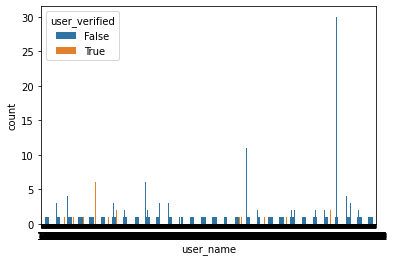

In [276]:
sns.countplot(x="user_name", hue="user_verified", data=data)

C:\Users\Rucha\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rucha\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rucha\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rucha\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Rucha\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 1

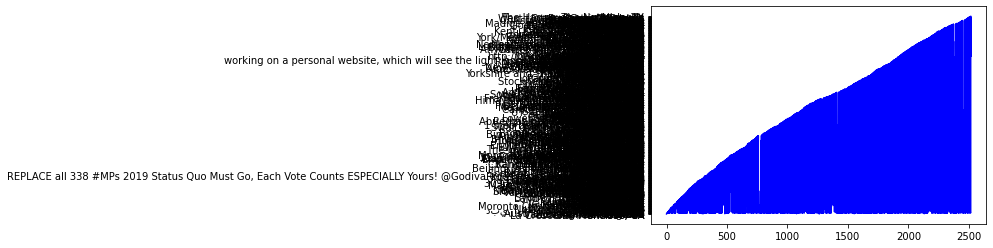

In [277]:
plt.plot(data["user_location"],color='b')
plt.show()

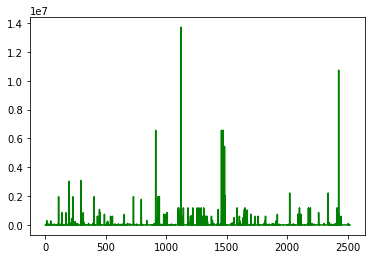

In [278]:
plt.plot(data['user_followers'],color='g')




In [316]:
take = []
drop = []
for j in data.columns:
  if j == 'text' or j == 'user_verified':
    take.append(j)
  else:
    drop.append(j)

drop

['user_name',
 'user_location',
 'user_description',
 'user_followers',
 'user_friends',
 'user_favourites',
 'hashtags',
 'source',
 'retweets',
 'favorites',
 'is_retweet']

In [317]:
x=data['text']
y=data['user_verified']

<AxesSubplot:xlabel='user_verified', ylabel='count'>

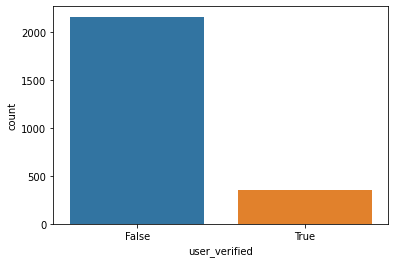

In [318]:
sns.countplot(x='user_verified', data=data)

In [319]:
verified_user=[]
nonverified_user=[]
for i in data['user_verified']:
 if  i==1:
   verified_user.append(i)
else:
    nonverified_user.append(i)
print("percentage of verified user = ",((len(verified_user)/len(data['user_verified']))*100))
print("percentage of not verified user = ",((len(nonverified_user)/len(data['user_verified']))*100))


percentage of verified user =  14.138204924543288
percentage of not verified user =  0.03971405877680699


### Performing NLP

In [320]:
from tensorflow import  keras
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [321]:
tokenizer = Tokenizer(10000,lower=True)
tokenizer.fit_on_texts(x)

sequence = tokenizer.texts_to_sequences(x)
final_input = pad_sequences(sequence,maxlen=200,padding='pre')

final_output = np.array(y)


In [322]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM,Dense,Embedding

model = Sequential()
model.add(
    Embedding(
        input_dim=10000,
        output_dim=120,
        input_length=200,
    ),)
model.add(
    Bidirectional(LSTM(64, return_sequences=True))
)
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 120)          1200000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 200, 128)         94720     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,336,001
Trainable params: 1,336,001
Non-trainable params: 0
_________________________________________________________________


In [323]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])





In [324]:
pred = model.fit(final_input,final_output,epochs=5,batch_size=32)


Epoch 1/5
79/79 [==============================] - 22s 172ms/step - loss: 0.4127 - accuracy: 0.8586
Epoch 2/5
79/79 [==============================] - 14s 180ms/step - loss: 0.3424 - accuracy: 0.8824
Epoch 3/5
79/79 [==============================] - 15s 184ms/step - loss: 0.2144 - accuracy: 0.8920
Epoch 4/5
79/79 [==============================] - 14s 181ms/step - loss: 0.0588 - accuracy: 0.9929
Epoch 5/5
79/79 [==============================] - 14s 181ms/step - loss: 0.0602 - accuracy: 0.9929


In [325]:
model.save("vaccine delivery.h5")

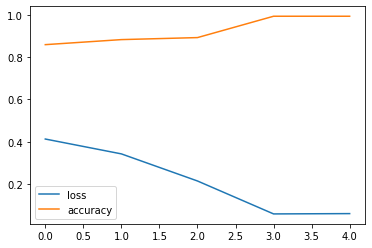

In [326]:


plt.plot(pred.history['loss'],label='loss')
plt.plot(pred.history['accuracy'],label='accuracy')
plt.legend(loc='best')
plt.show()


In [327]:
def verification(details):
  sentence_list = []
  sentence_list.append(details)
  fit = tokenizer.texts_to_sequences(sentence_list)
  sequence = pad_sequences(fit,maxlen=80,padding='pre')
  output = model.predict_classes(sequence)
  if output.all() == 1:
    print("Verified User")
  else:
    print("User is not verified")
    verification("While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm")